# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import GRU
import tensorflow as tf
import math
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


# Define Some Functions

In [3]:
def plot_predictions(test,predicted):
    plt.figure(figsize = (10,6))
    plt.plot(test, color='red',label='Real Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

In [4]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Data reading

In [5]:
dataset = pd.read_csv('goog2.csv', index_col='Date', parse_dates=['Date']) 
dataset.tail()

,Close,High,Low,Open,Adj Close
Date,,,,,
2019-04-29,1287.579956,1289.270020,1266.295044,1274.000000,1287.579956
2019-04-30,1188.479980,1192.810059,1175.000000,1185.000000,1188.479980
2019-05-01,1168.079956,1188.050049,1167.180054,1188.050049,1168.079956
2019-05-02,1162.609985,1174.189941,1155.001953,1167.760010,1162.609985
2019-05-03,1185.400024,1186.800049,1169.000000,1173.650024,1185.400024


In [6]:
dataset.tail(3)

,Close,High,Low,Open,Adj Close
Date,,,,,
2019-05-01,1168.079956,1188.050049,1167.180054,1188.050049,1168.079956
2019-05-02,1162.609985,1174.189941,1155.001953,1167.760010,1162.609985
2019-05-03,1185.400024,1186.800049,1169.000000,1173.650024,1185.400024


# Define Training and Test Set
We want to train upto 2017's data to predict 2018 and 2019's stock movement

In [7]:
training_set = dataset[:'2017'].iloc[:,0:5]
test_set = dataset['2018':].iloc[:,0:1]
training_set.head(2)

,Close,High,Low,Open,Adj Close
Date,,,,,
2005-05-05,112.75663,113.571327,112.210182,113.571327,112.75663
2005-05-06,113.27327,113.884293,112.503273,113.462036,113.27327


In [8]:
training_set.head(2)

,Close,High,Low,Open,Adj Close
Date,,,,,
2005-05-05,112.75663,113.571327,112.210182,113.571327,112.75663
2005-05-06,113.27327,113.884293,112.503273,113.462036,113.27327


In [9]:
test_set.tail(2)

,Close
Date,
2019-05-02,1162.609985
2019-05-03,1185.400024


In [10]:
len(training_set)

3187

In [11]:
len(test_set)

336

# Plotting Stock movement with test and train data

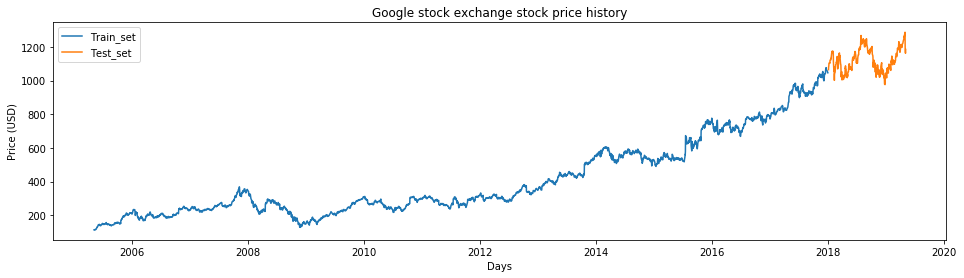

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))

plt.plot(training_set["Close"])
plt.plot(test_set["Close"])

plt.title('Google stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Train_set','Test_set'], loc='upper left')
plt.show()

# Reshaping the multidimentional series array to 1d array

In [25]:
train= training_set.values.reshape(-1, 1)
test = test_set.values.reshape(-1, 1)

In [26]:
train.shape

(15935, 1)

# Normalization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

# Split Data set

In [28]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

# Moving Average

In [268]:
#make predictions
preds = []
for i in range(0,len(test_set)):
    a = training_set['Close'][len(training_set)-len(test_set)+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [271]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(test_set['Close'])-preds),2)))
rms

566.4007490687118

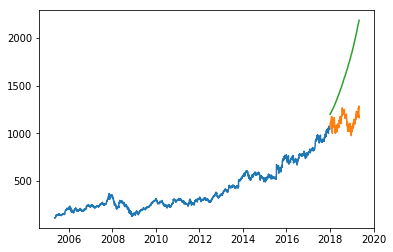

In [273]:
#plot
test_set['Predictions'] = 0
test_set['Predictions'] = preds
plt.plot(training_set['Close'])
plt.plot(test_set[['Close', 'Predictions']])

# ARIMA

In [13]:
from pmdarima import auto_arima

In [14]:
model = auto_arima(training_set['Close'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)






Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=21137.001, BIC=21167.315, Fit time=19.255 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=23269.658, BIC=23281.784, Fit time=0.409 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=22378.566, BIC=22402.817, Fit time=7.725 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=21135.059, BIC=21159.310, Fit time=16.145 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=21137.020, BIC=21167.333, Fit time=27.433 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=23269.937, BIC=23288.126, Fit time=1.629 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=21137.019, BIC=21167.332, Fit time=53.154 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=21139.043, BIC=21175.419, Fit time=50.741 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=21134.792, BIC=21152.980, Fit time=12.873 seconds
Fit 

NameError: name 'training' is not defined

In [16]:
model.fit(training_set['Close'])

forecast = model.predict(n_periods=len(test_set))
forecast = pd.DataFrame(forecast,index = test_set.index,columns=['Prediction'])

In [21]:
rms=np.sqrt(np.mean(np.power((np.array(test_set['Close'])-np.array(forecast['Prediction'])),2)))
rms

90.4133997958666

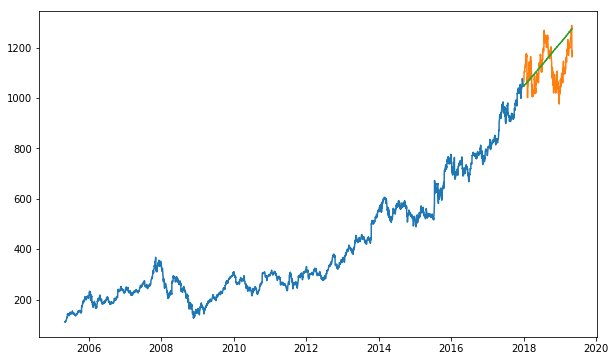

In [24]:
#plot
plt.figure(figsize = (10,6))
plt.plot(training_set['Close'])
plt.plot(test_set['Close'])
plt.plot(forecast['Prediction'])

# Recurrent Nueral Network Model
## Long-Short Term Memory (LSTM)

### Measuring Partial Autocorrelation

In [228]:
from statsmodels.tsa.stattools import pacf

In [229]:
dataset_pacf = pacf(dataset, nlags = 5, method = 'ols')

In [230]:
dataset_pacf

array([1.0,
       array([1.00016535, 1.00773737, 0.99181986, 0.99991287, 1.00016535]),
       array([ 5.81860138e-02,  2.65145371e-01, -2.27261777e-01, -1.28103749e-04,
        5.81860138e-02]),
       array([ 0.12716142, -0.18153613,  0.29826482,  0.00821393,  0.12716142]),
       array([-0.21303591, -0.25709012, -0.10919941, -0.13918812, -0.21303591]),
       array([0.35429788, 0.35608232, 0.46276931, 0.4521478 , 0.35429788])],
      dtype=object)

### Making Time Series at Lag - 2

In [239]:
XL_train = []
yL_train = []
for i in range(2,3187+2):
    XL_train.append(train_sc[i-2:i,0])
    yL_train.append(train_sc[i,0])
XL_train, yL_train = np.array(XL_train), np.array(yL_train)

In [240]:
XL_train = np.reshape(XL_train, (XL_train.shape[0],XL_train.shape[1],1))

### Applying LSTM

In [255]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=60, activation = 'tanh' , inner_activation = 'hard_sigmoid',return_sequences=True, input_shape=(XL_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=60))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

/Users/san/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=60, activation="tanh", return_sequences=True, input_shape=(2, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.


In [256]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=100, batch_size=256, verbose=1, callbacks=[early_stop], shuffle=True)




Epoch 1/100
3187/3187 [==============================] - 24s 8ms/step - loss: 0.4391
Epoch 2/100
3187/3187 [==============================] - 2s 488us/step - loss: 0.0144
Epoch 3/100
3187/3187 [==============================] - 2s 695us/step - loss: 0.0142
Epoch 4/100
3187/3187 [==============================] - 2s 661us/step - loss: 0.0141
Epoch 5/100
3187/3187 [==============================] - 2s 609us/step - loss: 0.0136
Epoch 6/100
3187/3187 [==============================] - 2s 514us/step - loss: 0.0097
Epoch 7/100
3187/3187 [==============================] - 2s 500us/step - loss: 0.0123
Epoch 8/100
3187/3187 [==============================] - 2s 503us/step - loss: 0.0103
Epoch 9/100
3187/3187 [==============================] - 2s 596us/step - loss: 0.0105
Epoch 10/100
3187/3187 [==============================] - 2s 685us/step - loss: 0.0109
Epoch 11/100
3187/3187 [==============================] - 2s 728us/step - loss: 0.0107
Epoch 12/100
3187/3187 [=============================

In [266]:
dataset_total = pd.concat((dataset["Close"][:'2018'],dataset["Close"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 2:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [267]:
XL_test = []
yL_test = []
for i in range(2,335+2): #lenght of y_test+2
    XL_test.append(inputs[i-2:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [253]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.8735664443653334.


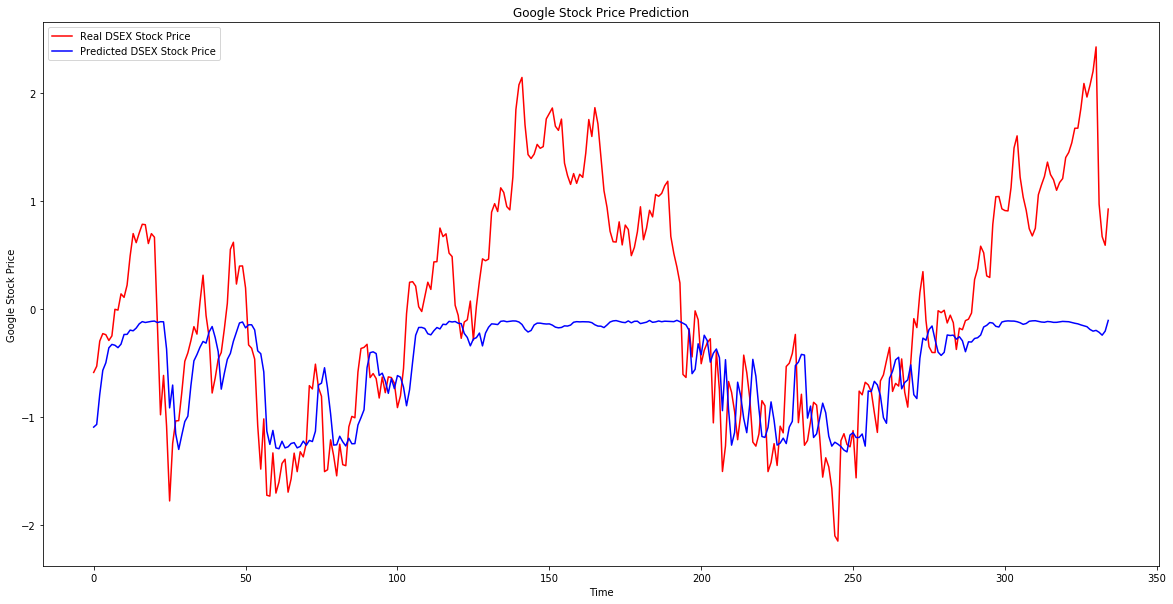

In [254]:
plot_predictions(y_test,predicted_stock_price)

#  Gated Recurrent Unit (GRU)

In [257]:
# The LSTM architecture
regressor = Sequential()
# First GRU layer 
regressor.add(GRU(units=60, activation = 'tanh' , inner_activation = 'hard_sigmoid',return_sequences=True, input_shape=(XL_train.shape[1],1)))
# Second GRU layer
regressor.add(GRU(units=60, return_sequences=True))
# Third GRU layer
regressor.add(GRU(units=60, return_sequences=True))
# Fourth GRU layer
regressor.add(GRU(units=60))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

/Users/san/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(units=60, activation="tanh", return_sequences=True, input_shape=(2, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.


In [259]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=250, batch_size=256, verbose=1, callbacks=[early_stop], shuffle=True)




Epoch 1/250
3187/3187 [==============================] - 1s 411us/step - loss: 0.0022
Epoch 2/250
3187/3187 [==============================] - 2s 607us/step - loss: 0.0019
Epoch 3/250
3187/3187 [==============================] - 2s 571us/step - loss: 0.0020
Epoch 4/250
3187/3187 [==============================] - 2s 712us/step - loss: 0.0019
Epoch 5/250
3187/3187 [==============================] - 2s 568us/step - loss: 0.0019
Epoch 6/250
3187/3187 [==============================] - 1s 468us/step - loss: 0.0020
Epoch 7/250
3187/3187 [==============================] - 1s 438us/step - loss: 0.0019
Epoch 8/250
3187/3187 [==============================] - 2s 511us/step - loss: 0.0017
Epoch 9/250
3187/3187 [==============================] - 2s 581us/step - loss: 0.0019
Epoch 10/250
3187/3187 [==============================] - 2s 474us/step - loss: 0.0020
Epoch 11/250
3187/3187 [==============================] - 1s 460us/step - loss: 0.0018
Epoch 12/250
3187/3187 [============================

In [260]:
dataset_total = pd.concat((dataset["Close"][:'2018'],dataset["Close"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 2:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [261]:
XL_test = []
yL_test = []
for i in range(2,335+2): #lenght of y_test+2
    XL_test.append(inputs[i-2:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [262]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.4543938977445383.


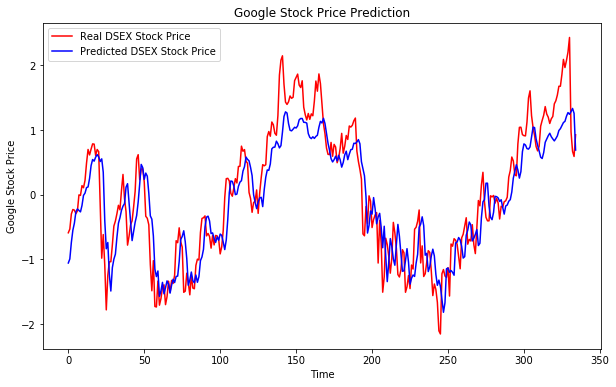

In [265]:
plot_predictions(y_test,predicted_stock_price)

# Linear Regression

In [275]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [276]:
#make predictions and find the rmse
preds = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

0.2807608194138677

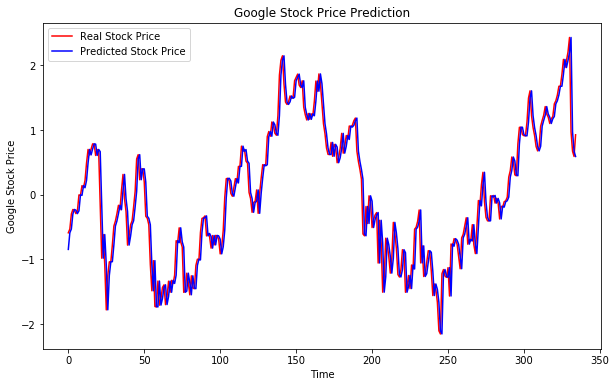

In [282]:
plot_predictions(y_test,preds)

In [283]:
y_testp = scaler.inverse_transform(y_test)

In [286]:
predsS = scaler.inverse_transform(preds)

In [287]:
return_rmse(y_testp,predsS)

The root mean squared error is 19.07412055687492.


# Applying ANN model

In [29]:
n_cols = X_train.shape[1]

In [30]:
nn_model = Sequential()

nn_model.add(Dense(12, activation='relu', input_shape=(n_cols,))) #Layer1
nn_model.add(Dense(12, activation='sigmoid')) #Layer 2

nn_model.add(Dense(1)) #Output Layer
nn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=4, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
15934/15934 [==============================] - 2s 137us/step - loss: 1.0434 - acc: 0.0000e+00
Epoch 2/100
15934/15934 [==============================] - 1s 38us/step - loss: 0.5604 - acc: 0.0000e+00
Epoch 3/100
15934/15934 [==============================] - 1s 35us/step - loss: 0.2338 - acc: 0.0000e+00
Epoch 4/100
15934/15934 [==============================] - 1s 44us/step - loss: 0.0923 - acc: 0.0000e+00
Epoch 5/100
15934/15934 [==============================] - 1s 36us/step - loss: 0.0573 - acc: 0.0000e+00
Epoch 6/100
15934/15934 [==============================] - 1s 35us/step - loss: 0.0487 - acc: 0.0000e+00
Epoch 7/100
15934/15934 [==============================] - 1s 43us/step - loss: 0.0433 - acc: 0.0000e+00
Epoch 8/100
15934/15934 [==============================] - 1s 35us/step - loss: 0.0389 - acc: 0.0000e+00
Epoch 9/100
15934/15934 [==============

In [31]:
nn_y_pred_test = nn_model.predict(X_test)

In [34]:
nn_y_pred_test

array([[-8.7148643e-01],
       [-6.3915402e-01],
       [-5.8409882e-01],
       [-3.5215726e-01],
       [-2.8053069e-01],
       [-2.9093572e-01],
       [-3.4641850e-01],
       [-3.0223545e-01],
       [-4.1214403e-02],
       [-4.9149539e-02],
       [ 1.3201052e-01],
       [ 9.2073351e-02],
       [ 2.2164264e-01],
       [ 4.7546163e-01],
       [ 6.7339009e-01],
       [ 5.9328437e-01],
       [ 6.7897904e-01],
       [ 7.5531060e-01],
       [ 7.5168705e-01],
       [ 5.8559227e-01],
       [ 6.7297065e-01],
       [ 6.4166415e-01],
       [-2.0401421e-01],
       [-9.8452115e-01],
       [-6.6519129e-01],
       [-1.0685650e+00],
       [-1.4380645e+00],
       [-1.1865351e+00],
       [-1.0299689e+00],
       [-1.0281079e+00],
       [-8.1122440e-01],
       [-5.3956532e-01],
       [-4.6283081e-01],
       [-3.4868506e-01],
       [-2.1270564e-01],
       [-2.8527632e-01],
       [ 3.7591163e-02],
       [ 3.0771345e-01],
       [-1.0401890e-01],
       [-3.1427094e-01],


### Calculating Root Mean Square and Plotting Actual vs Predicted

In [32]:
return_rmse(y_test,nn_y_pred_test)

The root mean squared error is 0.2768267332918585.


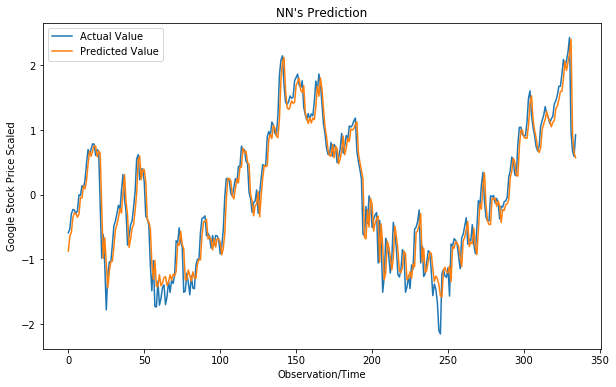

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Value')
plt.plot(nn_y_pred_test, label='Predicted Value')
plt.title("NN's Prediction")
plt.xlabel('Observation/Time')
plt.ylabel('Google Stock Price Scaled')
plt.legend()
plt.show();

### Return to Original Values

In [35]:
predicted_stock_price = scaler.inverse_transform(nn_y_pred_test)

In [36]:
y_testp = scaler.inverse_transform(y_test)

In [211]:
return_rmse(y_testp,predicted_stock_price)

The root mean squared error is 19.08415603702718.


# k-Nearest Neighbors Algorithm (KNN)

In [288]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [289]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)


In [290]:
model

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [295]:
#fit the model and make predictions
model.fit(X_train,y_train)
predsk = model.predict(X_test)

/Users/san/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [296]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

0.2801851383591317

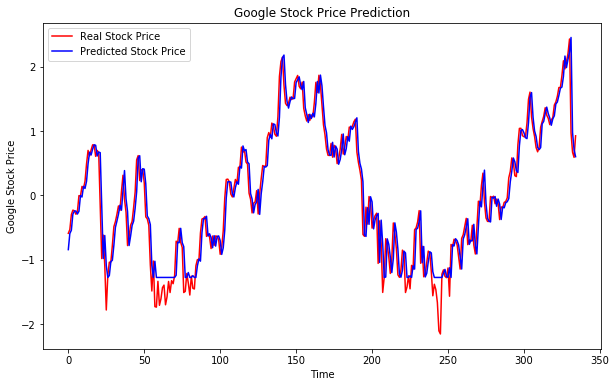

In [297]:
plot_predictions(y_test,predsk)

In [298]:
y_testp = scaler.inverse_transform(y_test)
predsS = scaler.inverse_transform(predsk)
return_rmse(y_testp,predsS)

The root mean squared error is 19.035010363852734.
